# SIS 1

# Some theoretical questions

## Exercise: Comparing MSE and RMSE

Given the following set of true values and predicted values from a regression model:

**True values :**  

$y_i$ = [500, 300, 800, 400, 6000]

**Predicted values :** 

$\hat{y_i}$ = [450, 350, 780, 420, 910]

1. Calculate on paper the **Mean Squared Error (MSE)** for this set of true and predicted values. 

   The formula for MSE is:  
   MSE = $\frac{1}{n} \Sigma_{i=1}^n({y_i}-\hat{y_i})^2$, where n is the number of data points.

2. What does the result quantify ? Explain with your own words.

3. What are the disadvantages of this metric ?

4. Calculate the **Root Mean Squared Error (RMSE)** for the same values.

   The formula for RMSE is:

   RMSE = $\sqrt{\frac{1}{n} \Sigma_{i=1}^n({y_i}-\hat{y_i})^2} = \sqrt{MSE}$

5. Interprete the results.

6. What is the difference with MSE ? How does it make it "better" ? In your opinion, why is the RMSE generally preferred in some situations over MSE ?

## Exercise: Bias Variance decomposition of MSE 

Given a model $\hat{f}(X)$ that predicts a value based on some input data, and the true value $Y$, prove that the **Mean Squared Error (MSE)** can be decomposed into two components: **Bias** and **Variance**, i.e. $\text{MSE} = \mathbb{E}[(\hat{Y} - Y)^2] = (\text{Bias}(\hat{Y}))^2 + \text{Var}(\hat{Y}) $

Where:
- **Bias** is the difference between the expected prediction and the true value, i.e., $\text{Bias} = \mathbb{E}[\hat{Y}] - Y$.
- **Variance** is the expected squared deviation of the predicted value from the expected predicted value, i.e., $\text{Variance} = \mathbb{E}[(\hat{Y} - \mathbb{E}[\hat{Y}])^2]$.


Hints:
- Use the identity : $(\hat{Y} - Y) = (\hat{Y} - \mathbb{E}[\hat{Y}]) + (\mathbb{E}[\hat{Y}] - Y) = (\hat{Y} - \mathbb{E}[\hat{Y}]) + \text{Bias}(\hat{Y})$
- Start by expanding the expression $(\hat{Y} - Y)^2$ to isolate the terms involving $\hat{Y}$ and $Y$.

# Coding exercise

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # you can also use seaborn if you prefer
import seaborn as sns
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
# Import the other necessary library here


In [3]:
# import the dataset
df = pd.read_csv("cars.csv")
df = df.fillna(value=float(0)) # replace NaN by float(0) (don't do this automatically in future projects, it can be source of under or overfitting. It should be done precociously)

### 1. Analyse your dataset. How many features and columns do we have ?

In [4]:
num_rows, num_cols = df.shape
print(f"Rows: {num_rows}, Colums: {num_cols}")

Rows: 8128, Colums: 12


### 2. What categorical variables are ordinal or nominal ? Encode them using OHE and Label encoder from SKLearn. 

In [5]:
df["engine"].fillna(df["engine"].median(), inplace=True)
df["max_power"].fillna(df["max_power"].median(), inplace=True)
df["seats"].fillna(df["seats"].mode()[0], inplace=True)

# Separation of categorical variables
ordinal_col = "owner"
nominal_cols = ["fuel", "seller_type", "transmission"]

# Label Encoding
le = LabelEncoder()
df[ordinal_col] = le.fit_transform(df[ordinal_col])

# One-Hot Encoding
df = pd.get_dummies(df, columns=nominal_cols, drop_first=True)

C:\Users\User\AppData\Local\Temp\ipykernel_4060\80759487.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["engine"].fillna(df["engine"].median(), inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_4060\80759487.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

### 3. Plot the distributions of Year, km_driven and mileage data. What could be a problem for convergence ?

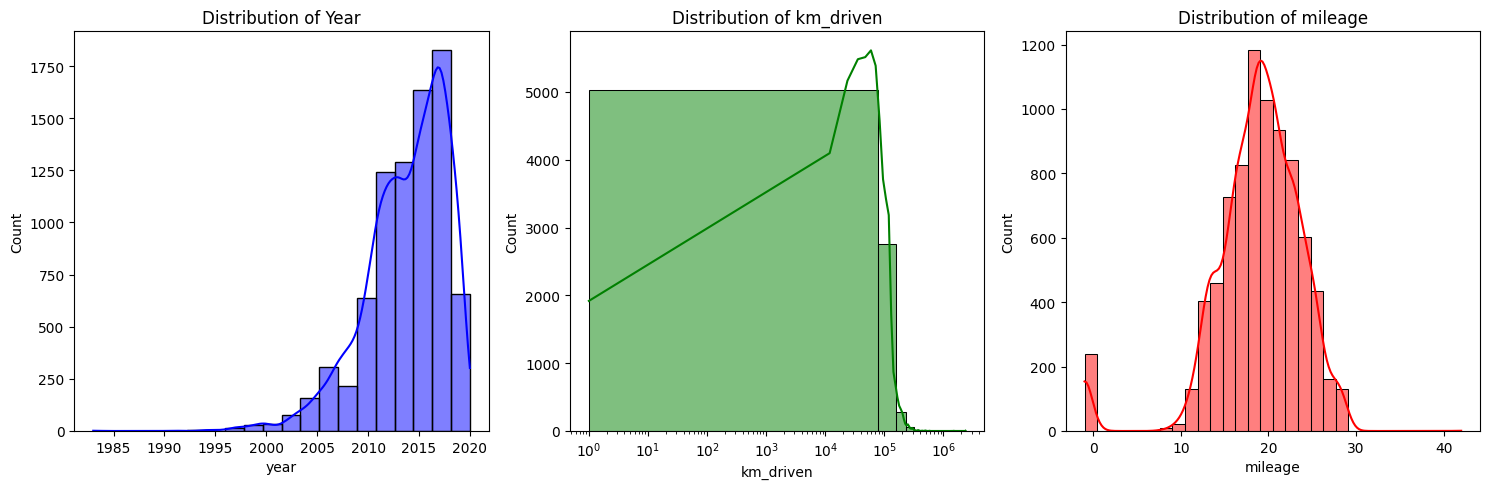

In [6]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(df["year"], bins=20, kde=True, color='blue')
plt.title("Distribution of Year")

plt.subplot(1, 3, 2)
sns.histplot(df["km_driven"], bins=30, kde=True, color='green')
plt.title("Distribution of km_driven")
plt.xscale("log")

plt.subplot(1, 3, 3)
sns.histplot(df["mileage"].dropna(), bins=30, kde=True, color='red')
plt.title("Distribution of mileage")
plt.tight_layout()
plt.show()

### 4. Scale those three numerical features, use whatever scaler you want

In [7]:
scaler = StandardScaler()
scaled_features = ["year", "km_driven", "mileage"]
df[scaled_features] = scaler.fit_transform(df[scaled_features])

### 5. Select Features and Target Variable
Separate X's to y

In [8]:
X = df.drop(columns=["name", "selling_price"])
y = df["selling_price"]


### 6. Plot the distribution of the Target variable 

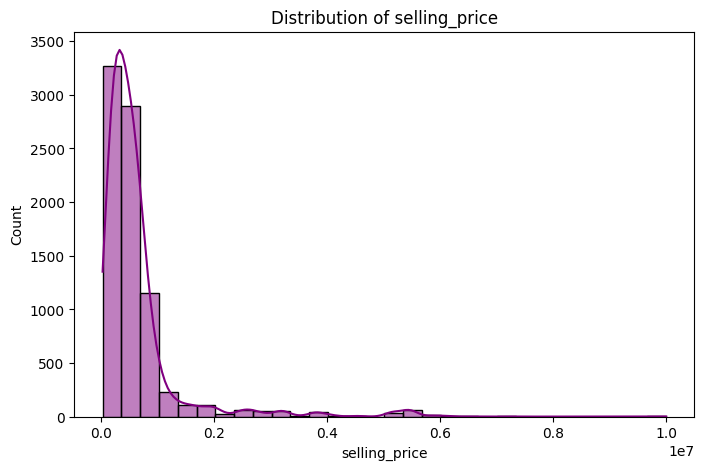

In [9]:
plt.figure(figsize=(8, 5))
sns.histplot(y, bins=30, kde=True, color='purple')
plt.title("Distribution of selling_price")
plt.show()

### 7. Split the Data
Split the dataset into training and testing sets. You should then have four dataset, X_train, X_test, y_train and y_test

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 8. Train a Gradient Boosting Model

The following code trains an ensemble Model. The class ```GradientBoostingRegressor(*params)```  setup the model and the function ```fit(X_train, y_train)``` trains and fits it.
- Use the function ```Predict()``` to predict y, both with your train and test datasets. (have a look at SKlearn documentation to use it)
- Compute the train and test Mean Squared Errors.


In [ ]:
n = 10 # number of estimators (relative to model complexity)

gbr = GradientBoostingRegressor(n_estimators=n, random_state=42, learning_rate=0.9) # dont change those parameters
gbr.fit(X_train, y_train)

# YOUR CODE GOES HERE

### Task 6: Increase the model complexity

Train your model in a loop that increase the parameter ```n```. Start at n = 10 to n = 5000 and step = 500 (otherwise your code will run for hours).

At each iterations : 
- reset the model
- train the model
- predict values using X_train
- compute the MSE of training and testing sets.
- store the new mse in a list

In [11]:
n = 10 # number of estimators (relative to model complexity)

gbr = GradientBoostingRegressor(n_estimators=n, random_state=42, learning_rate=0.9) # dont change those parameters
gbr.fit(X_train, y_train)

# YOUR CODE GOES HERE
y_train_pred = gbr.predict(X_train)
y_test_pred = gbr.predict(X_test)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Train MSE:", train_mse)
print("Test MSE:", test_mse)

Train MSE: 24900265403.04589
Test MSE: 34752995234.77122


### Task 7 : In one figure, plot both train and test MSE evolution, with respect to the model complexity (i.e. n) 

In [12]:
n_estimators_range = range(10, 5001, 500)
train_mse_list = []
test_mse_list = []

for n in n_estimators_range:
    gbr = GradientBoostingRegressor(n_estimators=n, learning_rate=0.9, random_state=42)
    gbr.fit(X_train, y_train)
    train_mse_list.append(mean_squared_error(y_train, gbr.predict(X_train)))
    test_mse_list.append(mean_squared_error(y_test, gbr.predict(X_test)))

### Task 8 : What can you observe ?


cetait difficile 

### Task 9 (Bonus) : In your opinion, what could we change in the code to improve our model fit ? 

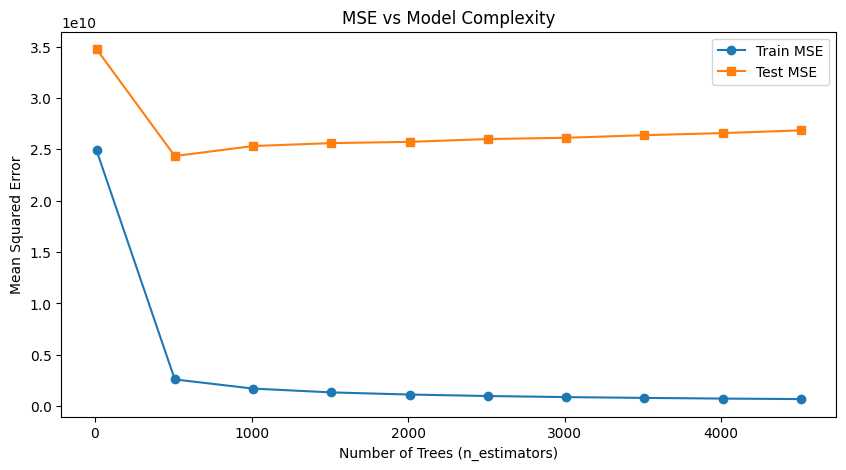

In [13]:
plt.figure(figsize=(10, 5))
plt.plot(n_estimators_range, train_mse_list, label="Train MSE", marker='o')
plt.plot(n_estimators_range, test_mse_list, label="Test MSE", marker='s')
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Mean Squared Error")
plt.title("MSE vs Model Complexity")
plt.legend()
plt.show()